In [1]:
import numpy as np
import galsim as gs
from shrbk.plot_psfs import *

## Examples of PSFs



- __Airy PSF__ 

If we dispose of an optical system with an aberration-free lens with a circular aperture, the resulting PSF would be the Airy disk [ref](https://en.wikipedia.org/wiki/Airy_disk). Its only contributor would be the diffraction phenomena.


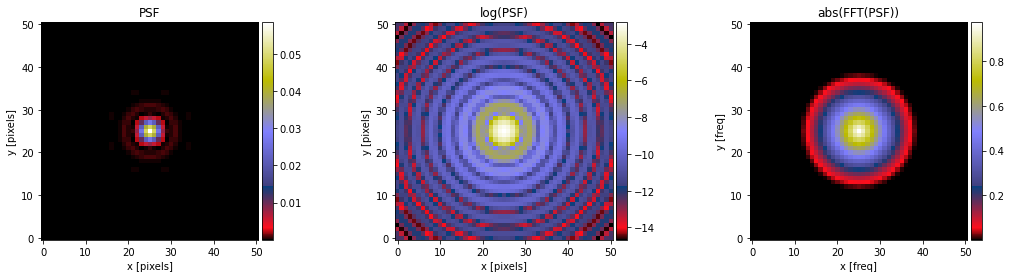

In [2]:
 
lam = 700    # nm (r-band most used band for weak lensing aplications)
diam = 1.0    # meters
image_size = 51 # pixels
pixel_scale = 0.04  # arcsec / pixel

airy = gs.Airy(lam=lam, diam=diam, scale_unit=gs.arcsec)
airy_psf = gs.ImageF(image_size, image_size)
_ = airy.drawImage(image=airy_psf, scale=pixel_scale)

plot_psf(airy_psf.array)

- __Ground-based PSF__

The PSFs observed with a ground-based optical system generally include the effects of the atmosphere. It can be seen as a varying low-pass filter so the PSFs will look more like blobs where the finer details were averaged by the atmosphere. We use a Moffat profile to model this type of PSF [ref](https://en.wikipedia.org/wiki/Moffat_distribution) for a long-exposure of a ground-based detector.


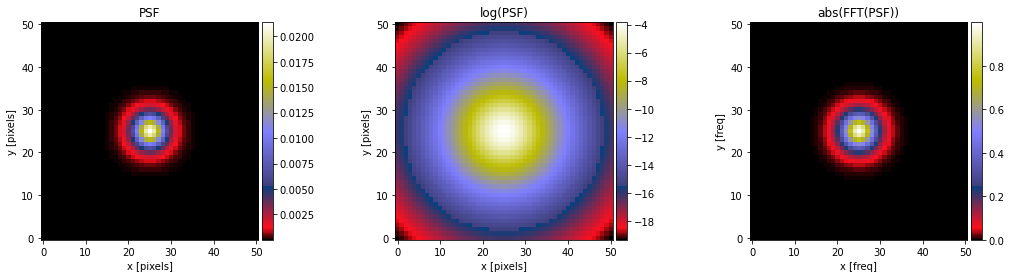

In [3]:

psf_beta = 5.       # dimensionless parameter
psf_re = 1.0       # arcsec
pixel_scale = 0.3  # arcsec / pixel

moffat = gs.Moffat(beta=psf_beta, half_light_radius=psf_re)
moffat_psf = gs.ImageF(image_size, image_size)
_ = moffat.drawImage(image=moffat_psf, scale=pixel_scale)

plot_psf(moffat_psf.array)


- __Space-based PSF__

The PSF observed by a space telescope is not affected by the atmosphere. That is one of the main motivations of space surveys. This is why they will be closer to the diffraction limit. The main contribution of these PSFs are the aberrations of the optical system. 


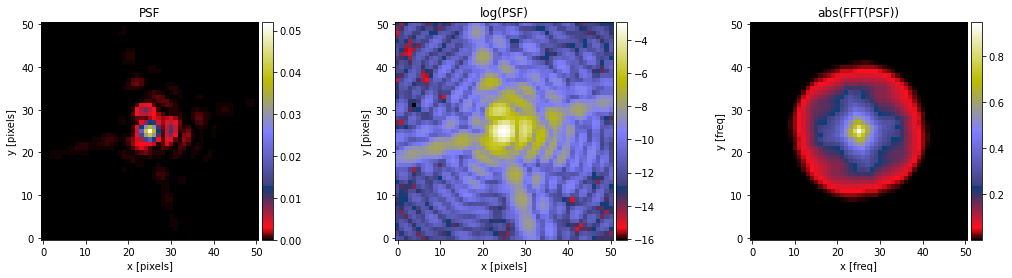

In [4]:
psf_D = 2.4            # meters
psf_lam = 700.0        # nanometers; note that OpticalPSF will automatically convert units to
                       # get lam/diam in units of arcsec, unless told otherwise.  In this case,
                       # that is (900e-9m / 2.4m) * 206265 arcsec/rad = 0.077 arcsec.
psf_obsc = 0.125       # (0.3m / 2.4m) = 0.125
psf_nstruts = 4
psf_strut_thick = 0.07
psf_strut_angle = 15 * gs.degrees

psf_defocus = 0.04     # The aberrations are all taken to be quite modest here.
psf_astig1 = 0.03      #
psf_astig2 = -0.01
psf_coma1 = 0.02
psf_coma2 = 0.04
psf_trefoil1 = -0.02
psf_trefoil2 = 0.04

pixel_scale = 0.02

optical = gs.OpticalPSF(
                lam=psf_lam, diam=psf_D, obscuration=psf_obsc,
                nstruts=psf_nstruts, strut_thick=psf_strut_thick, strut_angle=psf_strut_angle,
                defocus=psf_defocus, astig1=psf_astig1, astig2=psf_astig2,
                coma1=psf_coma1, coma2=psf_coma2, trefoil1=psf_trefoil1, trefoil2=psf_trefoil2)
    

optical_psf = gs.ImageF(image_size, image_size)
_ = optical.drawImage(image=optical_psf, scale=pixel_scale)

plot_psf(optical_psf.array)
